DATA CLEANING

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("occupational.csv")

# Show first few rows
df.head()



,Area Type,Area,Area Name,Standard Occupational Code,Occupational Title,Employment,Mean Wage,Median Wage,Entry Wage,Experienced Wage
0,1,36,New York State,00-0000,"Total, All Occupations",9392830.0,81061,58603.0,36871,103157.0
1,1,36,New York State,11-0000,Management Occupations,611690.0,183387,156228.0,82695,233733.0
2,1,36,New York State,11-1011,Chief Executives,7630.0,332030,218134.0,128735,433677.0
3,1,36,New York State,11-1021,General and Operations Managers,212770.0,169014,129400.0,68869,219086.0
4,1,36,New York State,11-1031,Legislators,NaN,107926,100930.0,43497,140140.0


In [45]:
df.columns = df.columns.str.strip()
df.columns



Index(['Area Type', 'Area', 'Area Name', 'Standard Occupational Code',
       'Occupational Title', 'Employment', 'Mean Wage', 'Median Wage',
       'Entry Wage', 'Experienced Wage'],
      dtype='object')

In [46]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area Type                   7069 non-null   int64  
 1   Area                        7069 non-null   int64  
 2   Area Name                   7069 non-null   object 
 3   Standard Occupational Code  7069 non-null   object 
 4   Occupational Title          7069 non-null   object 
 5   Employment                  5898 non-null   float64
 6   Mean Wage                   7069 non-null   int64  
 7   Median Wage                 6969 non-null   float64
 8   Entry Wage                  7069 non-null   int64  
 9   Experienced Wage            7001 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 552.4+ KB


In [47]:
df.isnull().sum()


Area Type                        0
Area                             0
Area Name                        0
Standard Occupational Code       0
Occupational Title               0
Employment                    1171
Mean Wage                        0
Median Wage                    100
Entry Wage                       0
Experienced Wage                68
dtype: int64

In [48]:
df_clean = df.dropna(subset=['Employment', 'Median Wage', 'Experienced Wage'])
df_clean.shape


(5827, 10)

BASIC EXPLORATION

In [49]:
df_clean['Occupational Title'].nunique()


735

In [50]:
df_clean['Occupational Title'].value_counts().head(10)


Occupational Title
Total, All Occupations                                                             11
First-Line Supervisors of Landscaping, Lawn Service, and Groundskeeping Workers    11
Building and Grounds Cleaning and Maintenance Occupations                          11
Hosts and Hostesses, Restaurant, Lounge, and Coffee Shop                           11
Dishwashers                                                                        11
Dining Room and Cafeteria Attendants and Bartender Helpers                         11
Food Servers, Nonrestaurant                                                        11
Waiters and Waitresses                                                             11
Management Occupations                                                             11
Bartenders                                                                         11
Name: count, dtype: int64

HEIGHEST PAYING JOBS

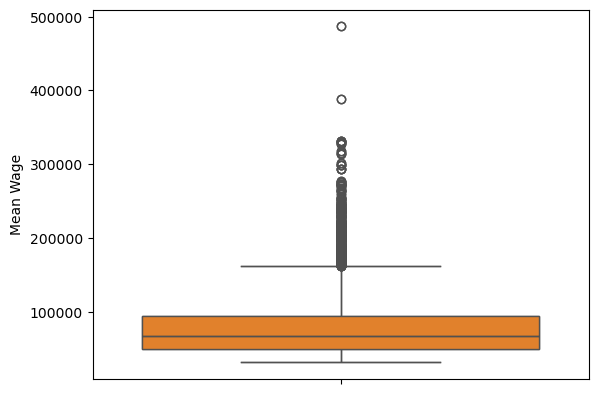

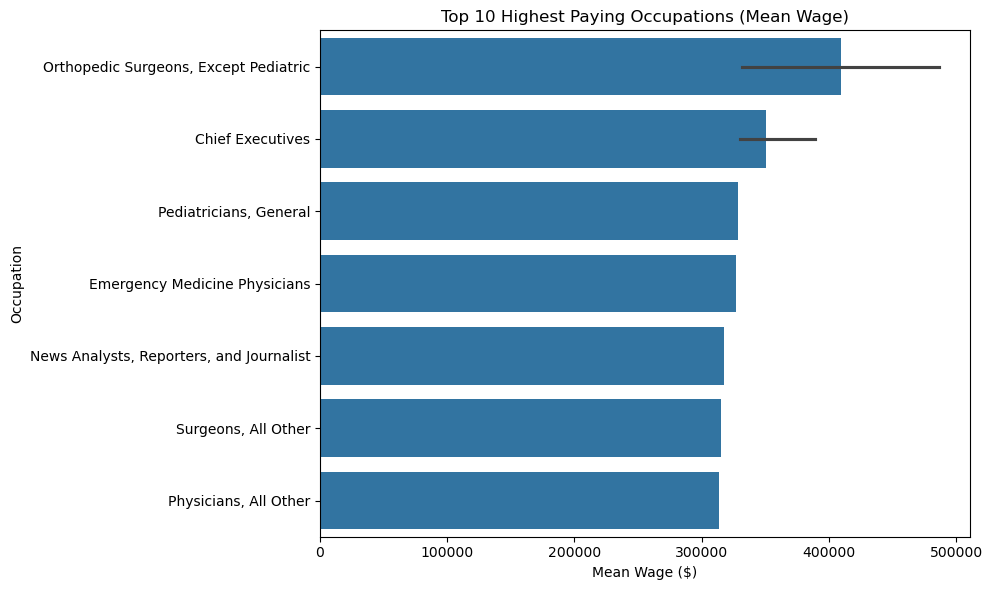

In [51]:
top_wages = df_clean.sort_values(by='Mean Wage', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Mean Wage', y='Occupational Title', data=top_wages)
plt.title('Top 10 Highest Paying Occupations (Mean Wage)')
plt.xlabel('Mean Wage ($)')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()


ENTRY VS EXPERIENCED WAGE COMPARISON

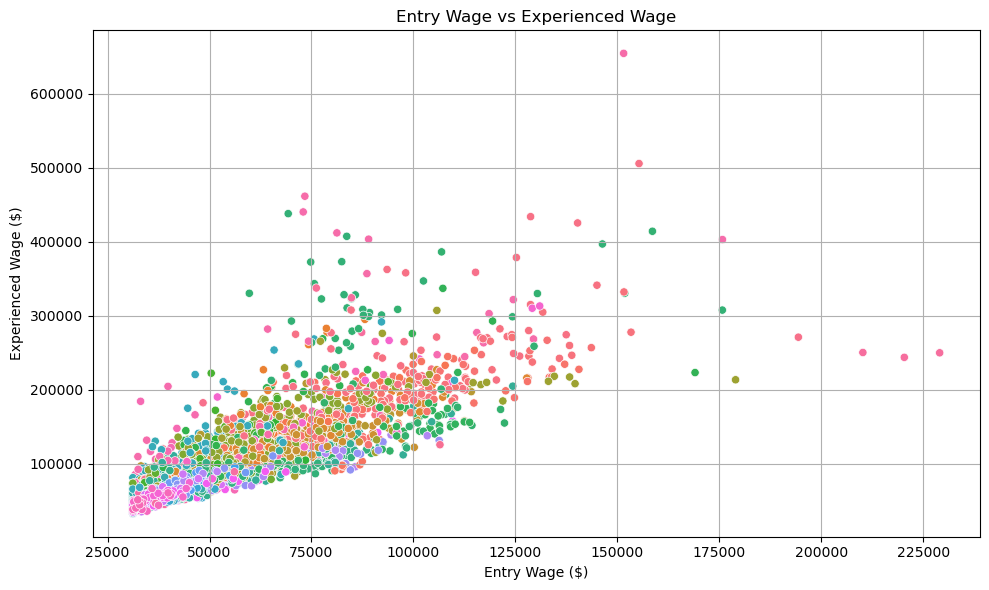

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='Entry Wage', y='Experienced Wage', hue='Occupational Title', legend=False)
plt.title('Entry Wage vs Experienced Wage')
plt.xlabel('Entry Wage ($)')
plt.ylabel('Experienced Wage ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
df_clean.loc[:, 'Wage Growth'] = df_clean['Experienced Wage'] - df_clean['Entry Wage']

df_clean[['Occupational Title', 'Entry Wage', 'Experienced Wage', 'Wage Growth']].head()


,Occupational Title,Entry Wage,Experienced Wage,Wage Growth
0,"Total, All Occupations",36871,103157.0,66286.0
1,Management Occupations,82695,233733.0,151038.0
2,Chief Executives,128735,433677.0,304942.0
3,General and Operations Managers,68869,219086.0,150217.0
5,Advertising and Promotions Managers,129446,267272.0,137826.0


MOST EMPLOYING OCCUPATION

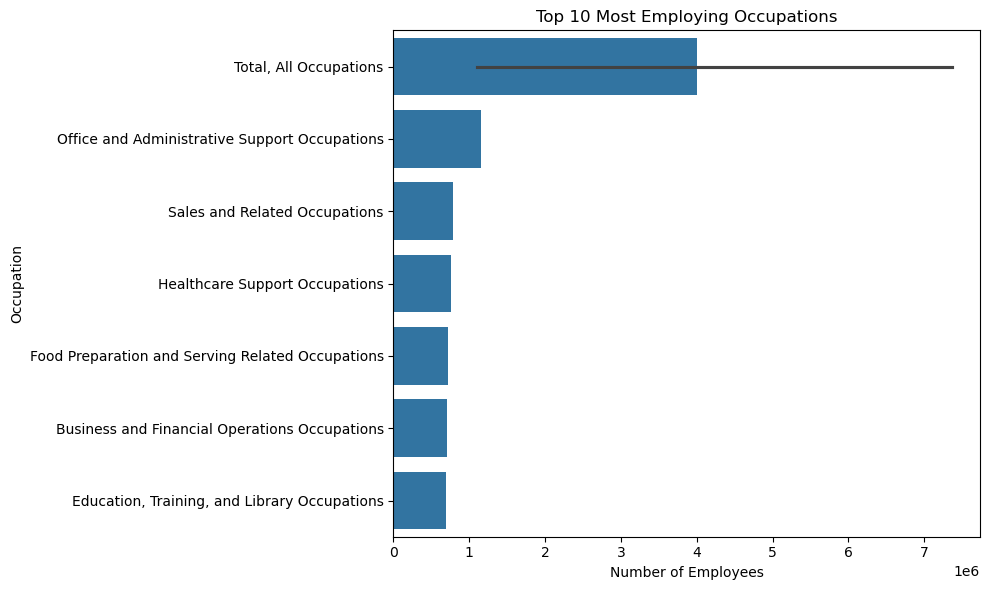

In [55]:
top_employment = df_clean.sort_values(by='Employment', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Employment', y='Occupational Title', data=top_employment)
plt.title('Top 10 Most Employing Occupations')
plt.xlabel('Number of Employees')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()


WAGE BY REGION

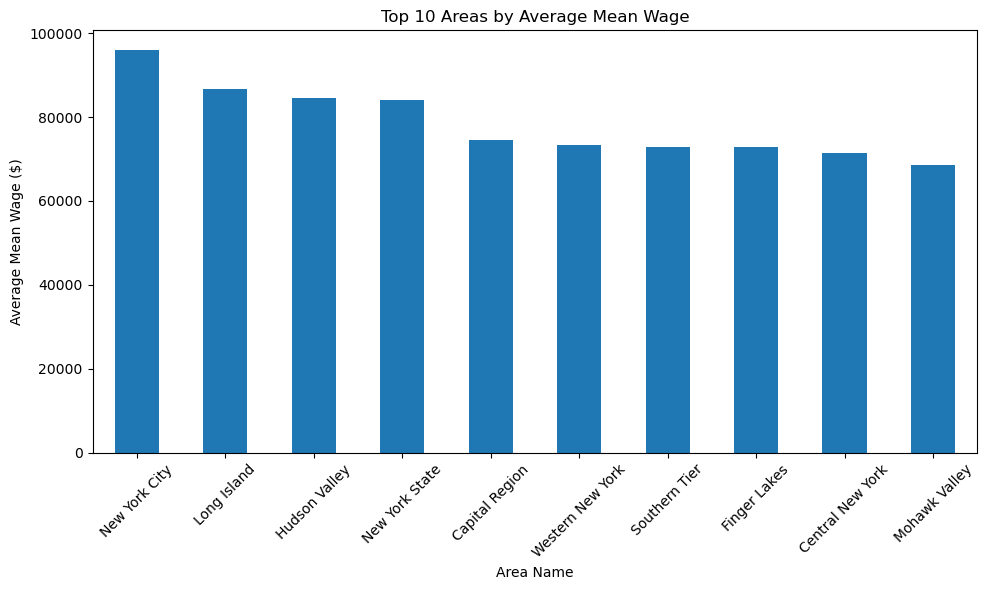

In [56]:
area_wages = df_clean.groupby('Area Name')['Mean Wage'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
area_wages.plot(kind='bar')
plt.title('Top 10 Areas by Average Mean Wage')
plt.xlabel('Area Name')
plt.ylabel('Average Mean Wage ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


CORRELATION HEATMAP

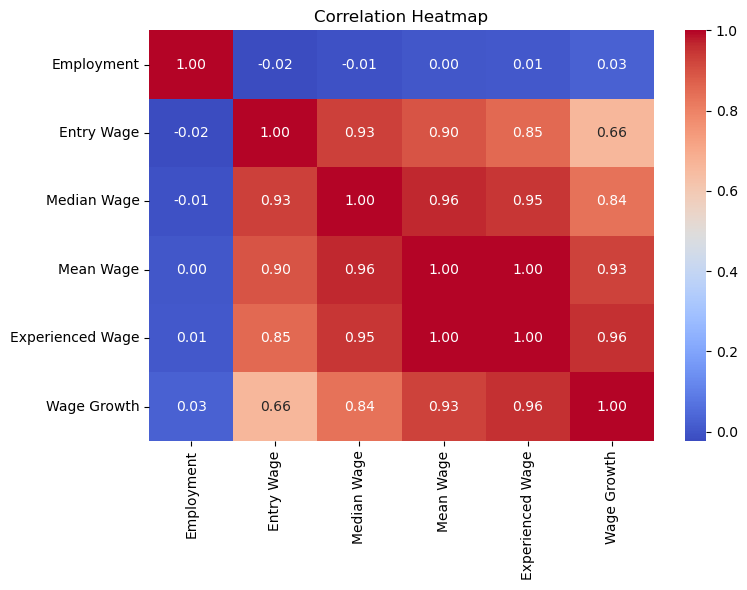

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['Employment', 'Entry Wage', 'Median Wage', 'Mean Wage', 'Experienced Wage', 'Wage Growth']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


BUILD A SIMPLE PREDICTION MODEL

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [59]:
features = ['Employment', 'Entry Wage', 'Experienced Wage']
X = df_clean[features]
y = df_clean['Mean Wage']


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [62]:
y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R^2 Score: 0.9999988761188143
Mean Squared Error: 1422.037384302225


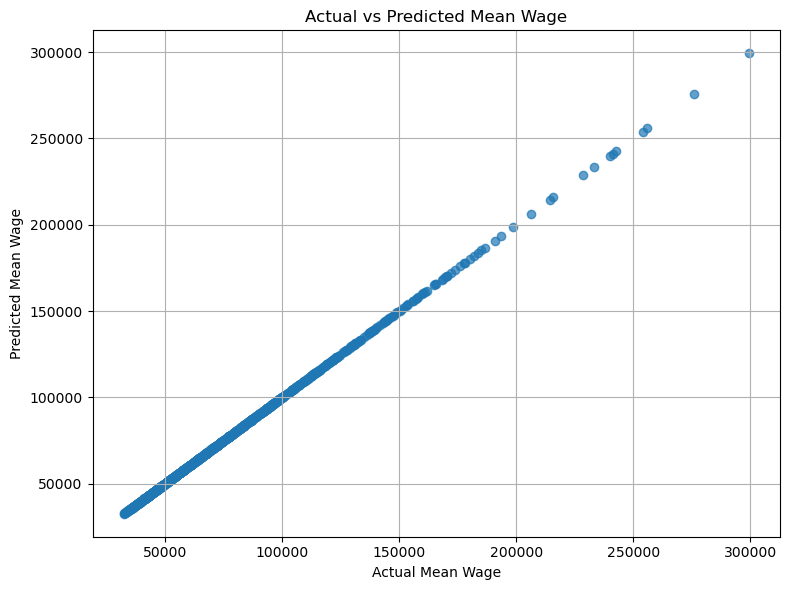

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Mean Wage")
plt.ylabel("Predicted Mean Wage")
plt.title("Actual vs Predicted Mean Wage")
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
def describe_wages(df):
    return df[['Entry Wage', 'Median Wage', 'Mean Wage', 'Experienced Wage']].describe()

describe_wages(df_clean)


,Entry Wage,Median Wage,Mean Wage,Experienced Wage
count,5827.000000,5827.000000,5827.000000,5827.000000
mean,51353.509010,71635.175219,78052.298610,91413.506950
std,20402.323273,35586.027747,40677.815512,52067.239629
min,31200.000000,31200.000000,31621.000000,32209.000000
25%,36367.500000,46424.000000,49172.000000,55118.500000
50%,45171.000000,62299.000000,66859.000000,77587.000000
75%,60056.000000,85620.000000,94392.000000,111376.000000
max,229046.000000,246419.000000,486768.000000,654376.000000


In [74]:
import numpy as np
df_clean.loc[:, 'Log Mean Wage'] = np.log(df_clean['Mean Wage'])



In [68]:
Q1 = df_clean['Mean Wage'].quantile(0.25)
Q3 = df_clean['Mean Wage'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_clean[(df_clean['Mean Wage'] < Q1 - 1.5*IQR) | (df_clean['Mean Wage'] > Q3 + 1.5*IQR)]
outliers.shape


(266, 12)

In [69]:
from scipy.stats import ttest_ind

high_emp = df_clean[df_clean['Employment'] > df_clean['Employment'].median()]
low_emp = df_clean[df_clean['Employment'] <= df_clean['Employment'].median()]

t_stat, p_val = ttest_ind(high_emp['Mean Wage'], low_emp['Mean Wage'], equal_var=False)
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_val:.4f}")


T-Statistic: 3.44, P-Value: 0.0006


In [70]:
from scipy.stats import shapiro

stat, p = shapiro(df_clean['Mean Wage'].sample(500))  # Use a sample for speed
print("Shapiro-Wilk test P-Value:", p)


Shapiro-Wilk test P-Value: 3.845823015841048e-22


In [72]:
df_clean.loc[:, 'High Income'] = (df_clean['Mean Wage'] > df_clean['Mean Wage'].median()).astype(int)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, df_clean.loc[y_train.index, 'High Income'])
clf.score(X_test, df_clean.loc[y_test.index, 'High Income'])


1.0